In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

from sklearn.cluster import KMeans

import src.wrangle as wr

In [38]:
train, _, _ = wr.split_zillow(wr.get_zillow())

In [39]:
seed = 42

In [40]:
location = ['latitude', 'longitude']
numerical = ['sqft', 'garage_sqft', 'lot_sqft', 'age']

In [41]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=seed)
loc_train = kmeans.fit_predict(train[location])
#loc_validate = kmeans.predict(X_validate[location])
#loc_test = kmeans.predict(X_test[location])

In [42]:
train.columns

Index(['sqft', 'garage_sqft', 'lot_sqft', 'age', 'structure_price', 'price',
       'land_price', 'tax_amount', 'bath', 'beds', 'bed_bath_ratio', 'city_id',
       'zip', 'latitude', 'longitude', 'fireplace', 'garage', 'hottub_spa',
       'pool', 'county_land_code', 'county_number', 'county_name', 'logerror'],
      dtype='object')

In [43]:
kmeans1 = KMeans(n_clusters=7, init='k-means++', random_state=seed)
num_train = kmeans1.fit_predict(train[numerical])
#num_validate = kmeans1.predict(X_validate[numerical])
#num_test = kmeans1.predict(X_test[numerical])

In [51]:
train['clusters_location'] = loc_train
train['numerical_clusters'] = num_train
train['abs_logerror'] = np.log(train.logerror)

In [58]:
train.clusters_location = train.clusters_location.replace({0:'cluster1', 1:'cluster2', 2:'cluster3', 3:'cluster4', \
                                         4:'cluster5', 5:'cluster6'})
train.numerical_clusters = train.clusters_location.replace({0:'cluster1', 1:'cluster2', 2:'cluster3', 3:'cluster4', \
                                         4:'cluster5', 5:'cluster6', 6:'cluster7'})

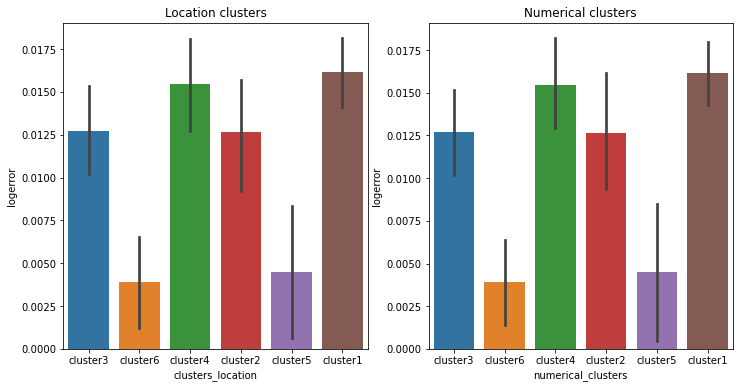

In [59]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.barplot(data=train, x='clusters_location', y='logerror')
plt.title('Location clusters')

plt.subplot(122)
sns.barplot(data=train, x='numerical_clusters', y='logerror')
plt.title('Numerical clusters')
plt.show()

In [ ]:
sns.catplot(data=train, x='clusters', y='logerror', kind='violin')

In [56]:
import scipy.stats as stats

In [ ]:
log_loc_1 = train

In [ ]:
stats.levene()

In [60]:
import src.clusters as cl

In [63]:
train_with_clusters = cl.train_with_clusters

In [66]:
train_with_clusters.columns

Index(['sqft', 'garage_sqft', 'lot_sqft', 'age', 'structure_price', 'price',
       'land_price', 'tax_amount', 'bath', 'beds', 'bed_bath_ratio', 'city_id',
       'zip', 'latitude', 'longitude', 'fireplace', 'garage', 'hottub_spa',
       'pool', 'county_land_code', 'county_number', 'county_name', 'logerror',
       'location_clusters', 'numerical_clusters'],
      dtype='object')

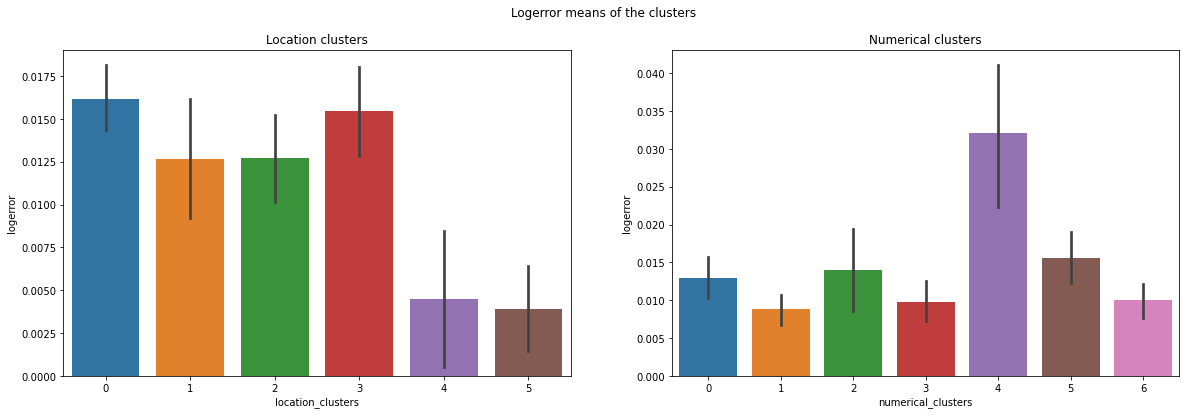

In [100]:
plt.figure(figsize=(20, 6))
plt.suptitle('Logerror means of the clusters')

plt.subplot(121)
sns.barplot(data=train_with_clusters, x='location_clusters', y='logerror')
plt.title('Location clusters')

plt.subplot(122)
sns.barplot(data=train_with_clusters, x='numerical_clusters', y='logerror')
plt.title('Numerical clusters')
plt.show()

In [68]:
train_with_clusters.logerror.min()

-0.5445401648899999

In [75]:
twc = train_with_clusters.copy()

In [70]:
twc0 = twc[twc.location_clusters == 0]
twc1 = twc[twc.location_clusters == 1]
twc2 = twc[twc.location_clusters == 2]
twc3 = twc[twc.location_clusters == 3]
twc4 = twc[twc.location_clusters == 4]
twc5 = twc[twc.location_clusters == 5]

In [71]:
stats.levene(twc0.logerror, twc1.logerror, twc2.logerror, twc3.logerror, twc4.logerror, twc5.logerror)

LeveneResult(statistic=84.86256624888006, pvalue=8.33894793354339e-89)

In [72]:
# we can not use anova
stats.kruskal(twc0.logerror, twc1.logerror, twc2.logerror, twc3.logerror, twc4.logerror, twc5.logerror)

KruskalResult(statistic=122.48490059613155, pvalue=9.338506299948676e-25)

In [73]:
# run the loop and t-test for every df vs .train.logerror mean

In [78]:
stats.ttest_1samp?

In [80]:
alpha = 0.05

In [77]:
for i in range(6):
    twc = train_with_clusters[train_with_clusters.location_clusters == i]
    print(stats.levene(twc.logerror, train.logerror) ) 

LeveneResult(statistic=75.61589494285764, pvalue=3.594846569056135e-18)
LeveneResult(statistic=31.830062384434825, pvalue=1.6978969588813768e-08)
LeveneResult(statistic=9.475133521477163, pvalue=0.002084462245934488)
LeveneResult(statistic=37.02950538642194, pvalue=1.1769129228329513e-09)
LeveneResult(statistic=5.583035785811285, pvalue=0.018141689629293842)
LeveneResult(statistic=176.24065914619834, pvalue=4.0161635112688966e-40)


In [79]:
for i in range(6):
    twc = train_with_clusters[train_with_clusters.location_clusters == i]
    print(stats.ttest_1samp(twc.logerror, train.logerror.mean()))

Ttest_1sampResult(statistic=5.225618018695617, pvalue=1.7863664409130607e-07)
Ttest_1sampResult(statistic=0.9100253101161059, pvalue=0.36290839968184574)
Ttest_1sampResult(statistic=1.199737375074957, pvalue=0.23029396806768543)
Ttest_1sampResult(statistic=3.246638823757338, pvalue=0.0011775152496555834)
Ttest_1sampResult(statistic=-3.2573217447246923, pvalue=0.0011440378595215927)
Ttest_1sampResult(statistic=-5.553054609314362, pvalue=2.9072604479129257e-08)


In [84]:
print('Location clusters')
for i in range(6):
    twc = train_with_clusters[train_with_clusters.location_clusters == i]
    t, p = stats.ttest_1samp(twc.logerror, train.logerror.mean())
    if p < alpha:
        print(f'Cluater {i}: the difference in means is significant. P-value={round(p, 3)}')
    else:
        print(f'Cluater {i}: the difference in means is not significant. P-value={round(p, 3)}')
print()

Location clusters
Cluater 0: the difference in means is significant. P-value=0.0
Cluater 1: the difference in means is not significant. P-value=0.363
Cluater 2: the difference in means is not significant. P-value=0.23
Cluater 3: the difference in means is significant. P-value=0.001
Cluater 4: the difference in means is significant. P-value=0.001
Cluater 5: the difference in means is significant. P-value=0.0



In [86]:
train['location_dummies'] = train.location_clusters.copy()

In [88]:
train.location_dummies = train.location_dummies.replace({0:1, 1:0, 2:0, 3:1, 4:1, 5:1})

In [97]:
locatio_dummies = train.location_dummies

In [92]:
print('Numerical clusters')
for i in range(7):
    twc = train_with_clusters[train_with_clusters.numerical_clusters == i]
    t, p = stats.ttest_1samp(twc.logerror, train.logerror.mean())
    if p < alpha:
        print(f'Cluater {i}: the difference in means is significant. P-value={round(p, 3)}')
    else:
        print(f'Cluater {i}: the difference in means is not significant. P-value={round(p, 3)}')
print()

Numerical clusters
Cluater 0: the difference in means is not significant. P-value=0.185
Cluater 1: the difference in means is significant. P-value=0.022
Cluater 2: the difference in means is not significant. P-value=0.29
Cluater 3: the difference in means is not significant. P-value=0.364
Cluater 4: the difference in means is significant. P-value=0.0
Cluater 5: the difference in means is significant. P-value=0.019
Cluater 6: the difference in means is not significant. P-value=0.323



In [93]:
train['numerical_dummies'] = train.numerical_clusters.copy()
train.numerical_dummies = train.numerical_dummies.replace({2:0, 3:0, 4:1, 5:1, 6:0})

In [96]:
numerical_dummies = train.numerical_dummies

In [105]:
def test_clusters():
    '''
    the function displays the results of t-test for every cluster' mean vs logerror' mean
    replaces signficant clusters with 1 and not significat with 0
    return 2 series of numerical and location cluser's dummies
    '''
    # print the results of location clusters
    print('Location clusters')
    for i in range(6):
        twc = train_with_clusters[train_with_clusters.location_clusters == i]
        t, p = stats.ttest_1samp(twc.logerror, train.logerror.mean())
        if p < alpha:
            print(f'Cluater {i}: the difference in means is significant. P-value={round(p, 3)}')
        else:
            print(f'Cluater {i}: the difference in means is not significant. P-value={round(p, 3)}')
    print()
    # creaate dummies for location clusters
    train['location_dummies'] = train.location_clusters.copy()
    train.location_dummies = train.location_dummies.replace({0:1, 1:0, 2:0, 3:1, 4:1, 5:1})
    locatio_dummies = train.location_dummies
    
    # print the results of numerical clusters
    print('Numerical clusters')
    for i in range(7):
        twc = train_with_clusters[train_with_clusters.numerical_clusters == i]
        t, p = stats.ttest_1samp(twc.logerror, train.logerror.mean())
        if p < alpha:
            print(f'Cluater {i}: the difference in means is significant. P-value={round(p, 3)}')
        else:
            print(f'Cluater {i}: the difference in means is not significant. P-value={round(p, 3)}')
    print()
    
    # create dummies for numerical clusters
    train['numerical_dummies'] = train.numerical_clusters.copy()
    train.numerical_dummies = train.numerical_dummies.replace({2:0, 3:0, 4:1, 5:1, 6:0})
    numerical_dummies = train.numerical_dummies
    
    #return locatio_dummies, numerical_dummies

In [101]:
def viz_cluster_means():
    '''
    the function creates barplots with means of 
    location and numerical clusters
    '''
    plt.figure(figsize=(20, 6))
    plt.suptitle('Logerror means of the clusters')

    plt.subplot(121)
    sns.barplot(data=train_with_clusters, x='location_clusters', y='logerror')
    plt.title('Location clusters')

    plt.subplot(122)
    sns.barplot(data=train_with_clusters, x='numerical_clusters', y='logerror')
    plt.title('Numerical clusters')
    plt.show()

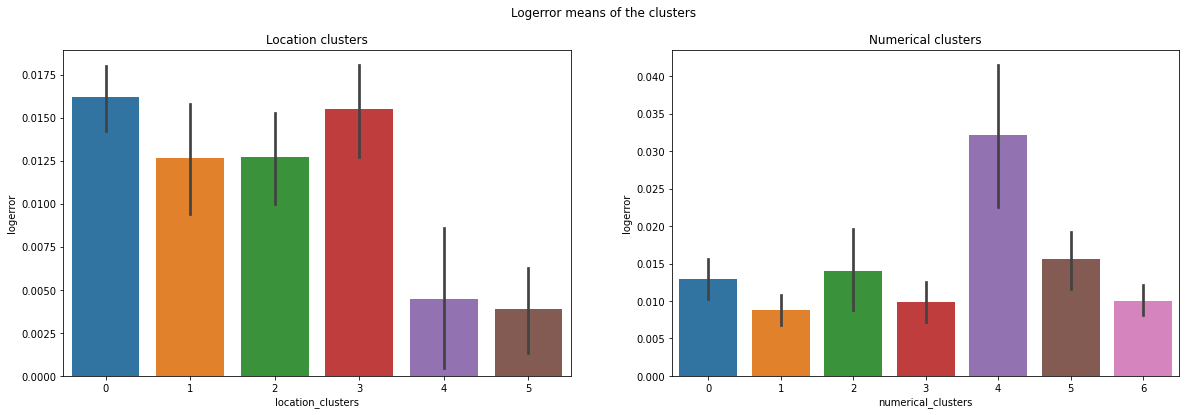

In [102]:
viz_cluster_means()

In [104]:
a, b = test_clusters()

Location clusters
Cluater 0: the difference in means is significant. P-value=0.0
Cluater 1: the difference in means is not significant. P-value=0.363
Cluater 2: the difference in means is not significant. P-value=0.23
Cluater 3: the difference in means is significant. P-value=0.001
Cluater 4: the difference in means is significant. P-value=0.001
Cluater 5: the difference in means is significant. P-value=0.0

Numerical clusters
Cluater 0: the difference in means is not significant. P-value=0.185
Cluater 1: the difference in means is significant. P-value=0.022
Cluater 2: the difference in means is not significant. P-value=0.29
Cluater 3: the difference in means is not significant. P-value=0.364
Cluater 4: the difference in means is significant. P-value=0.0
Cluater 5: the difference in means is significant. P-value=0.019
Cluater 6: the difference in means is not significant. P-value=0.323



In [124]:
loc_train, loc_validate, loc_test = cl.loc_train, cl.loc_validate, cl.loc_test

In [111]:
loc_train

array([2, 2, 5, ..., 5, 0, 0], dtype=int32)

In [115]:
lc = lc.replace({1:0, 0:1, 2:0, 3:1, 4:1, 5:1})

In [122]:
loc_train

(array([0]),)